1 2.6088390350341797 59.00
 0.00 59.0
2 3.612442970275879 60.00
 0.00 60.0
3 4.618308782577515 61.00
 0.00 61.0
4 5.624319076538086 61.00
 0.00 61.0
5 6.630411863327026 61.00
 0.00 61.0
6 7.632455825805664 61.00
 0.00 61.0
7 8.637158870697021 61.00
 0.00 61.0
8 9.643051862716675 61.00
 0.00 61.0
9 10.648940801620483 61.00
 0.00 61.0
10 11.650959968566895 61.00
 0.00 61.0


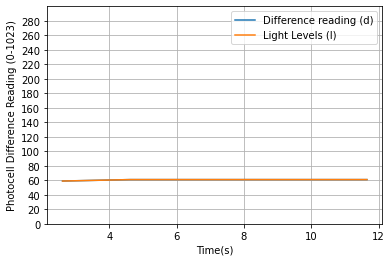

Darkness Reading =  0.00
Average light levels:  60.7
Average difference between light and dark:  60.7
the end


In [12]:
import serial
import time
import csv
import numpy as np
import matplotlib.pyplot as plt


#import schedule
timestr = time.strftime("%Y%m%d-%H%M%S") 
#FILE_NAME = 'Photometer 2.0a5 - '+timestr+'.csv'
FILE_NAME = '2mL Additional Test.csv' #appending existing list

list_values = []
list_in_floats = []
t = []
l = []
d = []
dark = 0.0
l_sum = 0.0
d_sum = 0.0

#controls
count = 10
create_file = True

if create_file == True: 
    f = open(FILE_NAME,'a',newline='')          # open a file for 'a'ppending , creates the file if it does not exist
    writer = csv.writer(f,delimiter=',')        # prepare for writing to file , Write Arduino ino accordingly
    # Write data-field titles to file
    writer.writerow(['trial 5', '.','.','Date:)', timestr])#appending existing list
    writer.writerow(['Measurement #','Time (s)','Photocell Reading (l)', 'Darkcell Reading', ' Difference (d)'])

n = 1             # count how many data-points collected
startTime = time.time() # capture current time as datum
arduino = serial.Serial('/dev/cu.usbmodem14101', 9600) #move arduino to void loop and get rid of 'for' loop

try:
    while n<=count:
    #    print('Connected') #trouble shooting
        arduino_data = arduino.readline() # reads a header that is not needed
    #    print(arduino_data) #trouble shooting - b'1,14.00,25.00\r\n'
        decoded_values = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
    #    print(decoded_values) #trouble shootin - 1,14.00,25.00
        list_values = decoded_values.split(',') #serial moniter printout:"measurement num,darkcell,photocell reading"

        for item in list_values: 
            list_in_floats.append(float(item))

        tn=time.time()-startTime
        light = list_values[2]
        dark = list_values[1]
        diff = list_in_floats[2]-list_in_floats[1]
        print(n,tn,light,dark,diff)
        if create_file == True: 
            writer.writerow([n,tn,light,dark,diff])

        t.append(tn)     # store the current time
        l.append(float(light))     # store the current light reading
        d.append(diff)

        n = n + 1
        arduino_data = 0
        list_in_floats.clear()
        list_values.clear()
    #    arduino.close()   # closes board connection
        time.sleep(1)    # take a data point every second

except KeyboardInterrupt:
    arduino.close()   # close board connection - not really neccessary unless you have a time limit set on your arduino 
    print("womp womp womp...something went wrong...Restart?>")
    if create_file == True:
        f.close()       # close file gracefully when program is terminated

#plot graph
plt.figure()
plt.ylim(0,300)
plt.yticks(np.arange(0.00, 300.0,20.0))
plt.plot(t, d, label="Difference reading (d)")
plt.plot(t, l, label="Light Levels (l)")
plt.xlabel("Time(s)")
plt.ylabel("Photocell Difference Reading (0-1023)")            
plt.legend()
plt.grid()
plt.show()
print("Darkness Reading = ", dark)

for item in l:
    l_sum = l_sum + item
for item in d:
    d_sum = d_sum + item
print("Average light levels: ", l_sum/count)
print("Average difference between light and dark: ", d_sum/count)
    
arduino.close()   # closes board connection - neccessary w/ time limit set on arduino
if create_file == True:
    writer.writerow(["Average","-",l_sum/count,dark,d_sum/count])
    f.close()       # close file when program is terminated
    
print("the end")